In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv('ushape.csv', names=['X','Y','class'])

In [11]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [27]:
X = df.iloc[:,:2].values
Y = df.iloc[:,-1].values

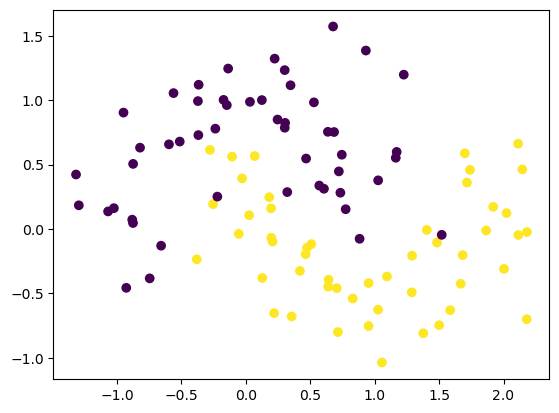

In [31]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [35]:
clf.fit(X, Y)

LogisticRegression()

<Axes: >

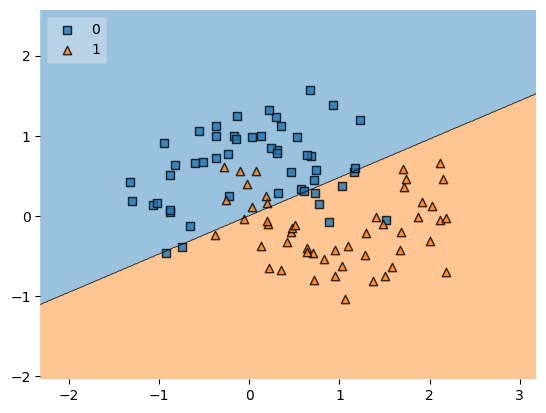

In [37]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, Y.astype('int'), clf, legend=2)

In [39]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, X, Y, scoring='accuracy', cv=10))

0.8300000000000001

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_trf = poly.fit_transform(X)

In [45]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1, X_trf, Y, scoring='accuracy', cv=10))

0.9

In [47]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

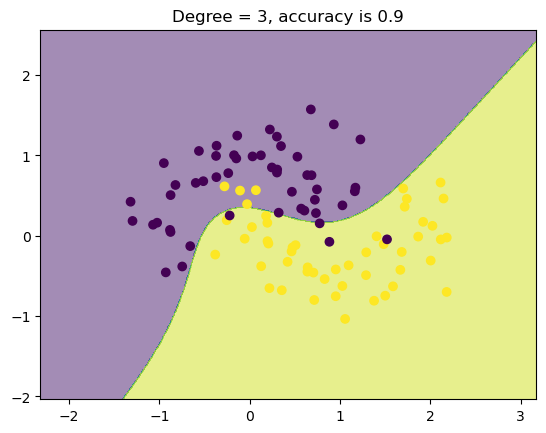

In [51]:
plot_decision_boundary(X,Y,degree=3)


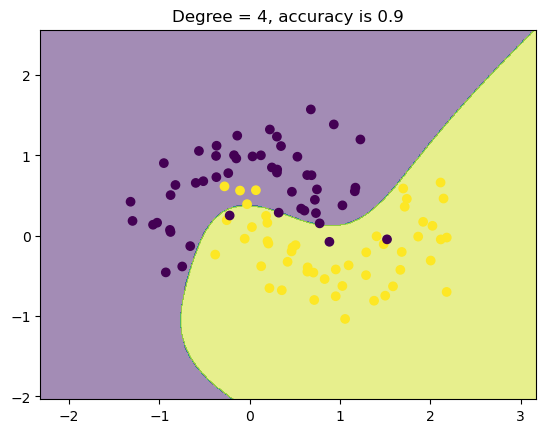

In [57]:
plot_decision_boundary(X,Y,degree=4)


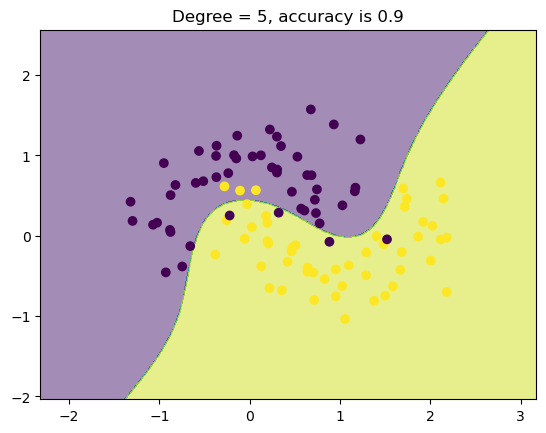

In [61]:
plot_decision_boundary(X,Y,degree=5)
